# GreenOpenAIHelper
数据分析部分，建立包括"查看评估""切割拼接"等工具合集

0612 start

0613 date

0614 pre

## 0 基础知识 建立以Dota为核心的数据转换
### dota数据概况
DOTA-v1.0 contains **15** common categories, 2,806 images and 188, 282 instances. 

DOTA-v1.5 uses the same images as DOTA-v1.0, but the extremely small instances (less than 10 pixels) are also annotated. Moreover, a new category, ”container crane” is added. It contains **403,318** instances in total. 

DOTA-v2.0 collects more Google Earth, GF-2 Satellite, and aerial images. There are **18** common categories, 11,268 images and **1,793,658** instances in DOTA-v2.0. 

格式上全部是png图片，不带地理空间信息。

![jupyter](./DDDImages/dota_type.png)

在dota_devkit_yolo中，输入就是这种格式：
![jupyter](./DDDImages/dota_type2.png)

经过split后为这种格式，仍然是dota格式，但是名字上面多了一些东西
`from ImgSplit import splitbase
split = splitbase(r'example', r'examplesplit', choosebestpoint=True)
split.splitdata(0.5)
split.splitdata(1)
split.splitdata(2)`
![jupyter](./DDDImages/dota_type3.png)

### Fair1m-v2.0 数据概况
**1 million instances** and more than 40,000 images in this dataset. All objects in the FAIR1M dataset are annotated with respect to 5 categories and **37 sub-categories**

标注instance上是类似的，但是Fair1m采用了更多的图，而且使用了tif从而带地理空间信息

#### 比较最新版本，两者标注数量大致相当，Fair1m数据更大，Dota单个图像的instance更多

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 20.0)
#新建
from DOTA import DOTA
import dota_utils as util

### 1 格式转换

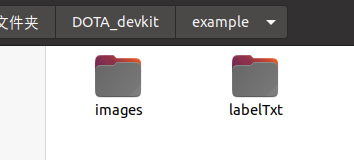

### 2.查看评估

In [9]:
#example = DOTA('example')#example为dota方式数据
dateBaseName = 'TianzhiBoat/train/' 
example = DOTA(dateBaseName )

In [ ]:
imgids = example.getImgIds()
imgid = imgids[0]
img = example.loadImgs(imgid)[0]#需要注意文件格式

DOTA.py
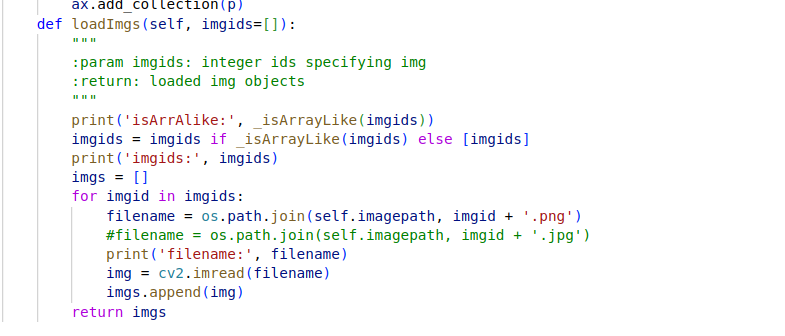

In [ ]:
#显示原图
plt.axis('off')
plt.imshow(img)

In [ ]:
#显示单幅标注结果
anns = example.loadAnns(imgId=imgid)
example.showAnns(anns, imgid, 1) #range参数没有使用

In [ ]:
!rm DateWatch/*.* 
anns = example.loadAnns(imgId=imgid)
example.SaveAnns(anns, imgid) #保存到DateWatch目录下

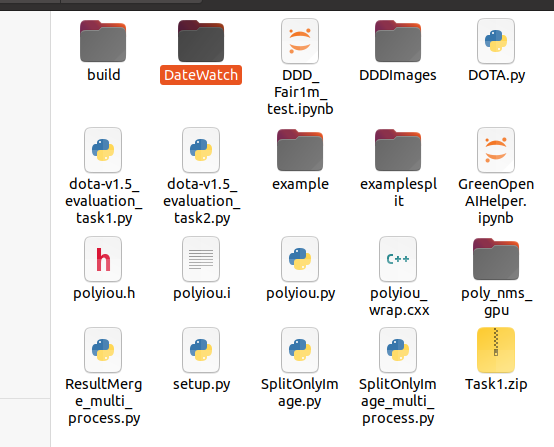

In [ ]:
!rm DateWatch/*.*
#批量保存查看标注结果。
#耗时较长，需要研究并行方法
for imgid in imgids:
    anns = example.loadAnns(imgId=imgid)
    example.SaveAnns(anns, imgid) #保存到DateWatch目录下

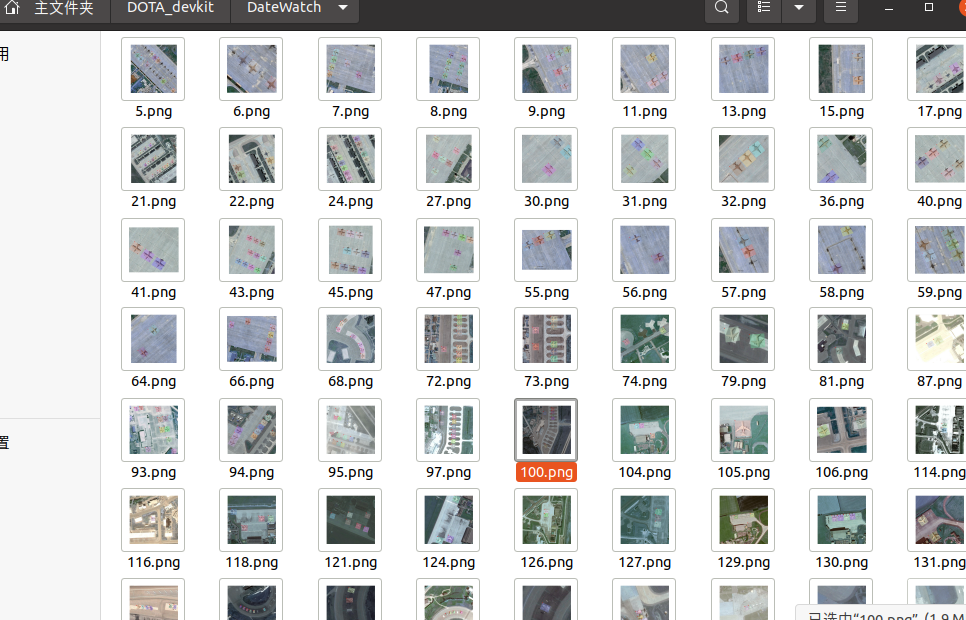

In [2]:
#查看label的划分
def count_objects_in_txt_files(directory):
    object_counts = {}
    # os.walk遍历目录及其子目录
    for foldername, subfolders, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith('.txt'):
                file_path = os.path.join(foldername, filename)
                with open(file_path, 'r') as file:
                    for line in file:
                        fields = line.split()
                        object_type = fields[-2]  # 获取目标种类
                        object_counts[object_type] = object_counts.get(object_type, 0) + 1
    return object_counts

In [4]:
directory = 'TianzhiBoat/train/labelTxt'  # 替换为你的目标目录
object_counts = count_objects_in_txt_files(directory)
for object_type, count in object_counts.items():
    print(f'{object_type}: {count}')

bigship: 168


### 3.数据切割（如果使用mmrotate，推荐使用其自带的数据切割工具）
dota数据集中的数据需要进行切割。

对于test数据，只需要切割image就可以，使用"SplitOnlyImage.py"

In [5]:
from ImgSplit import splitbase

In [6]:
!rm examplesplit -r
!mkdir examplesplit/images -p
!mkdir examplesplit/labelTxt
!ls

build			       _polyiou.cpython-38-x86_64-linux-gnu.so
DateWatch		       polyiou.h
DDD_Fair1m_test.ipynb	       polyiou.i
DOTA2COCO.py		       polyiou.py
dota_evaluation_task1.py       polyiou_wrap.cxx
dota_evaluation_task2.py       poly_nms_gpu
DOTA.py			       __pycache__
dota_utils.py		       readme.md
dota-v1.5_evaluation_task1.py  restoredexample
dota-v1.5_evaluation_task2.py  ResultMerge_multi_process.py
example			       ResultMerge.py
examplesplit		       setup.py
FAIR1M2DOTA.py		       SplitOnlyImage_multi_process.py
GreenOpenAIHelper.ipynb        SplitOnlyImage.py
ImgSplit_multi_process.py      Task1
ImgSplit.py		       Task1_merge
MAR20_2_DOTA.py		       test_split
mar20txt.py		       test_Task1
mmrotate_2_Dota.py	       test_Task1_merge
mmrotate_2_fair1mVOC.py        TianzhiBoat
polyiou.cpp		       yolo_2_fair1mVOC.py


In [ ]:
from ImgSplit import splitbase
#根据参数进行切割
split = splitbase(dateBaseName, r'examplesplit', ext = '.png')
split.splitdata(1)

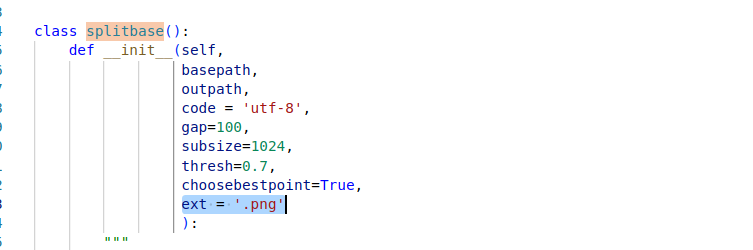

In [ ]:
#缩放完成后显示
examplesplit = DOTA('examplesplit')

In [ ]:
imgids = examplesplit.getImgIds()
imgid = imgids[1]
img = examplesplit.loadImgs(imgid)[0]

In [ ]:
plt.axis('off')
plt.imshow(img)

In [ ]:
anns = examplesplit.loadAnns(imgId=imgid)
examplesplit.showAnns(anns, imgid, 1)

### 模型训练和test推断，使用MMrotate完成

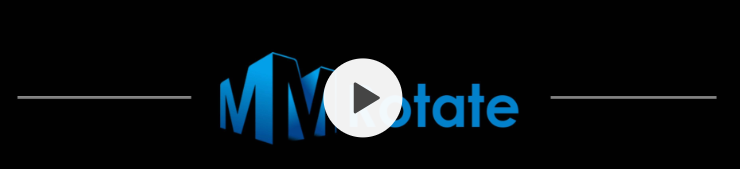

### 4.数据拼接
为了提交或则是观察，需要将推断后的数据需要拼接回去

使用老版本mmrotate可以直接生成推断结果，使用mmrotate_2_Dota或mmrotate_2_fair1mVOC

In [ ]:
!swig -c++ -python polyiou.i
!python3 setup.py build_ext --inplace

In [ ]:
from ResultMerge import mergebypoly

In [ ]:
#创建Task1目录，也就是OBB目录
!mkdir Task1 
!mkdir Task1_merge

In [ ]:
#该方法按照目标对现有数据进行分类，每类目标全部存放在一个文件中（这种方法符合DOTA的结果提交形式）
util.groundtruth2Task1(r'examplesplit/labelTxt',r'Task1')
!ls Task1

In [ ]:
!cat Task1/Task1_ship.txt

In [ ]:
!mkdir restoredexample/labelTxt -p  #创建保存结果的目录
mergebypoly(r'Task1',r'Task1_merge') 
!ls Task1_merge 

In [ ]:
!cat Task1_merge/Task1_ship.txt #此时已经将结果拼接起来了

In [ ]:
util.Task2groundtruth_poly(r'Task1_merge',r'restoredexample/labelTxt') #复原为Dota的格式
!ls restoredexample/labelTxt

### 而后可以选择提交或者是查看